## Import des librairies


In [223]:
import numpy as np
import pandas as pd
import tensorflow as tf
!pip install category_encoders

In [224]:
tf.__version__

'2.3.0'

# Importing Dataset

In [225]:
dataset = pd.read_csv('export.csv')
x = dataset.iloc[:, [True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]].values # Toutes les colonnes à partir de l'index 3 jusqu'à l'avant dernière 
y = dataset.iloc[:, 5].values # Uniquement la dernière colonne du dataset (expected)

In [226]:
print(x[0])

['Guingamp' 'Monaco' 'French Ligue 1' '2016/17' 1 1 0 0 0 0 0 0 0 0 0 0 3
 2 2 0 0 0 0 0 0 0 0 0 0 3]


In [227]:
print(y)

['HOME' 'HOME' 'AWAY' ... 'AWAY' 'HOME' 'HOME']


# Encoding Data

In [228]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

ct = ColumnTransformer(transformers=[('encoder', ce.BinaryEncoder(), [0, 1, 2, 3])], remainder='passthrough')
cty = ColumnTransformer(transformers=[('encoder', ce.BinaryEncoder(), [0])], remainder='passthrough')

x = np.array(ct.fit_transform(x))

y=y.reshape(-1,1)

y = np.array(cty.fit_transform(y))


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [229]:
print(y)

[[0 0 1]
 [0 0 1]
 [0 1 0]
 ...
 [0 1 0]
 [0 0 1]
 [0 0 1]]


In [230]:
print(x)

[[0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 3]
 ...
 [0 0 0 ... 6 4 7]
 [0 0 0 ... 6 1 6]
 [0 0 1 ... 1 2 7]]


# Splitting the dataset into the Training set and Test set


In [231]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Feature Scaling

In [232]:
 from sklearn.preprocessing import StandardScaler
 sc = StandardScaler()
 x_train = sc.fit_transform(x_train)
 x_test = sc.transform(x_test)

# Init ANN

In [261]:
ann = tf.keras.models.Sequential()

In [262]:
input_dimension = x_test[0].shape[0]
print(input_dimension)

52


### Add layers


In [263]:
ann.add(tf.keras.layers.Dense(128, activation='tanh', input_dim=input_dimension))

### Output Layers

In [264]:
ann.add(tf.keras.layers.Dense(units = 3, activation='softmax')) 

### Compile

In [265]:
from keras.metrics import categorical_accuracy

ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training

In [266]:
history = ann.fit(x_train, y_train, epochs = 20,batch_size=100, validation_data=(x_test, y_test))

Epoch 1/20
74/74 [==============================] - 0s 3ms/step - loss: 0.9459 - accuracy: 0.6030 - val_loss: 0.8000 - val_accuracy: 0.6542
Epoch 2/20
74/74 [==============================] - 0s 2ms/step - loss: 0.7357 - accuracy: 0.6600 - val_loss: 0.6938 - val_accuracy: 0.6672
Epoch 3/20
74/74 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6593 - val_loss: 0.6640 - val_accuracy: 0.6569
Epoch 4/20
74/74 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.6595 - val_loss: 0.6552 - val_accuracy: 0.6515
Epoch 5/20
74/74 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6611 - val_loss: 0.6444 - val_accuracy: 0.6640
Epoch 6/20
74/74 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.6644 - val_loss: 0.6414 - val_accuracy: 0.6569
Epoch 7/20
74/74 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.6664 - val_loss: 0.6410 - val_accuracy: 0.6488
Epoch 8/20
74/74 [==

## History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


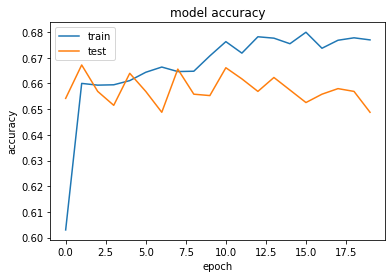

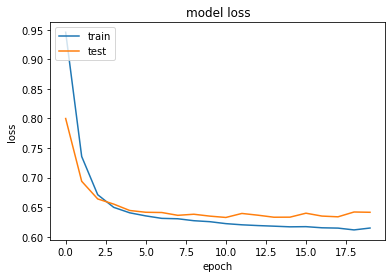

In [267]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predict

In [268]:
pred_train= ann.predict(x_train)
scores = ann.evaluate(x_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= ann.predict(x_test)
scores2 = ann.evaluate(x_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))   

Accuracy on training data: 0.68143630027771% 
 Error on training data: 0.31856369972229004
Accuracy on test data: 0.6487804651260376% 
 Error on test data: 0.3512195348739624
